In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-high-quality-made-backpacks/USA High Quality Made - Backpacks.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv('/kaggle/input/usa-high-quality-made-backpacks/USA High Quality Made - Backpacks.csv')
df.head()

,Product,Brand,Country of Origin,Type,Image URL,Laptop Compartment,Capacity (Volume in Liter),Material,Average Weight (Kg),Waterproof,Water-repellent,Price (USD)
0,Surge Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,31,210D recycled nylon ripstop with non-PFC durab...,1.2,No,Yes,129
1,Borealis Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,28,210D recycled nylon ripstop with non-PFC durab...,1,No,Yes,99
2,Router Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,40,210D recycled nylon ripstop with non-PFC durab...,1.3,No,Yes,159
3,Commuter Roll Top Pack,The North Face,USA,Commuting/Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,23,300D recycled polyester with TPU laminate,0.9,No,Yes,129
4,Jester Backpack,The North Face,USA,Daypack,https://images.thenorthface.com/is/image/TheNo...,Yes,28,600D recycled polyester with non-PFC durable w...,0.74,No,Yes,69


In [5]:
df.columns

Index(['Product', 'Brand', 'Country of Origin', 'Type', 'Image URL',
       'Laptop Compartment', 'Capacity (Volume in Liter)', 'Material',
       'Average Weight (Kg)', 'Waterproof', 'Water-repellent', 'Price (USD)'],
      dtype='object')

In [6]:
# Dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Product                     107 non-null    object
 1   Brand                       107 non-null    object
 2   Country of Origin           107 non-null    object
 3   Type                        107 non-null    object
 4   Image URL                   107 non-null    object
 5   Laptop Compartment          107 non-null    object
 6   Capacity (Volume in Liter)  107 non-null    object
 7   Material                    107 non-null    object
 8   Average Weight (Kg)         107 non-null    object
 9   Waterproof                  107 non-null    object
 10  Water-repellent             107 non-null    object
 11  Price (USD)                 107 non-null    object
dtypes: object(12)
memory usage: 10.2+ KB
None


In [7]:
# Data Visualization

# Ensure Price is numeric (remove non-numeric symbols if any)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce')

# Ensure Waterproof is categorical (optional but clean)
df['Waterproof'] = df['Waterproof'].astype(str)

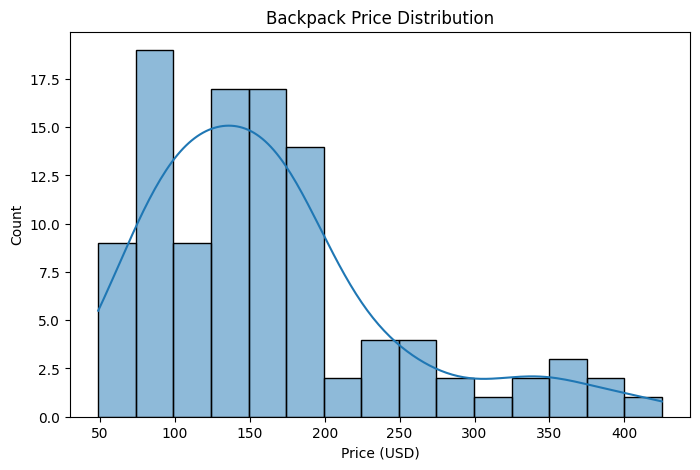

In [8]:
# Price Distribution 
plt.figure(figsize=(8,5))
sns.histplot(df['Price (USD)'], bins=15, kde=True)
plt.title("Backpack Price Distribution")
plt.show()

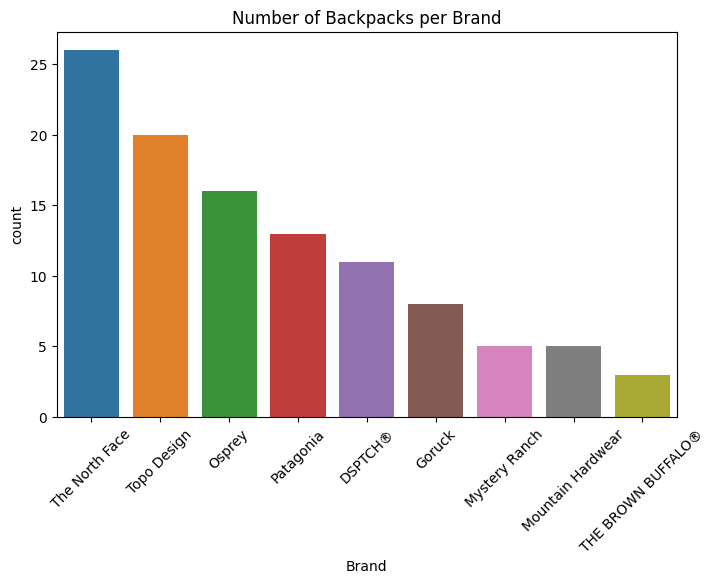

In [9]:
# Number of Backpacks per Brand
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Brand', order=df['Brand'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Backpacks per Brand")
plt.show()

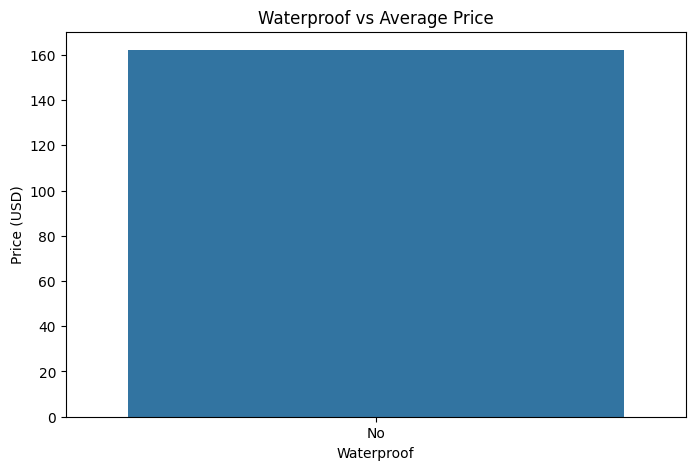

In [10]:
# Waterproof vs Price
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Waterproof', y='Price (USD)', estimator='mean', errorbar=None)
plt.title("Waterproof vs Average Price")
plt.show()

In [11]:
# Data Preprocessing
# Encode categorical columns
encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col])

In [12]:
# Features & Target
X = df.drop('Price (USD)', axis=1)
y = df['Price (USD)']

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

In [15]:
# Remove rows with NaN target in training set
# Combine X_train and y_train to filter NaNs together
train_data = X_train.copy()
train_data['target'] = y_train

# Drop rows where target is NaN
train_data = train_data.dropna(subset=['target'])

# Separate features and target again
X_train_clean = train_data.drop(columns=['target'])
y_train_clean = train_data['target']

In [16]:
# Define models 
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# Train and evaluate models
scores = {}
for name, model in models.items():
    model.fit(X_train_clean, y_train_clean)
    preds = model.predict(X_test)
    scores[name] = r2_score(y_test, preds)

# Show scores
print(scores)

{'Linear Regression': 0.515960520351201, 'Decision Tree': -0.0996242287744824, 'Random Forest': 0.6293093526605311, 'Gradient Boosting': 0.6627648684594922, 'XGBoost': 0.49201553511599383}


In [17]:
# Find Best Model
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with R² score = {scores[best_model_name]:.4f}")

Best Model: Gradient Boosting with R² score = 0.6628


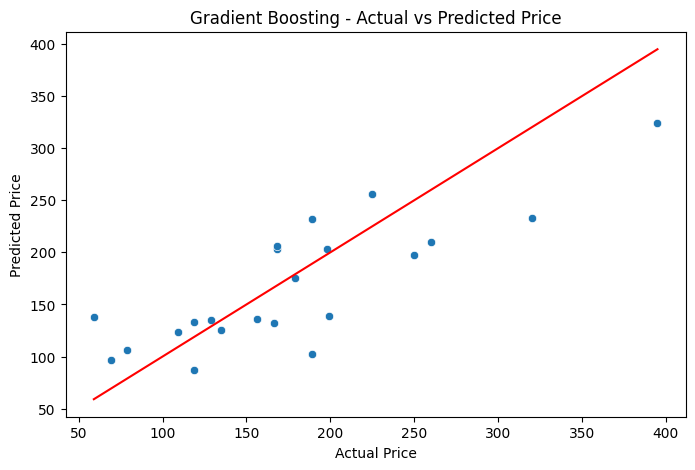

In [18]:
# Visualize Predictions from Best Model
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"{best_model_name} - Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect line
plt.show()